### I made this exercise thanks to [Car Prediction Dataset](https://www.kaggle.com/datasets/zafarali27/car-price-prediction/data). I'm going to analyze and create models to predict car prices.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# First we create the dataframe and see what's inside
df= pd.read_csv('data/car_price_prediction_.csv')
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [10]:
# Calculate the number of missing values per column
missing_values = df.isnull().sum()
missing_values

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

### There's none, which is a good sign

Text(0.5, 1.0, 'Boxplot of Car Prices by Brand')

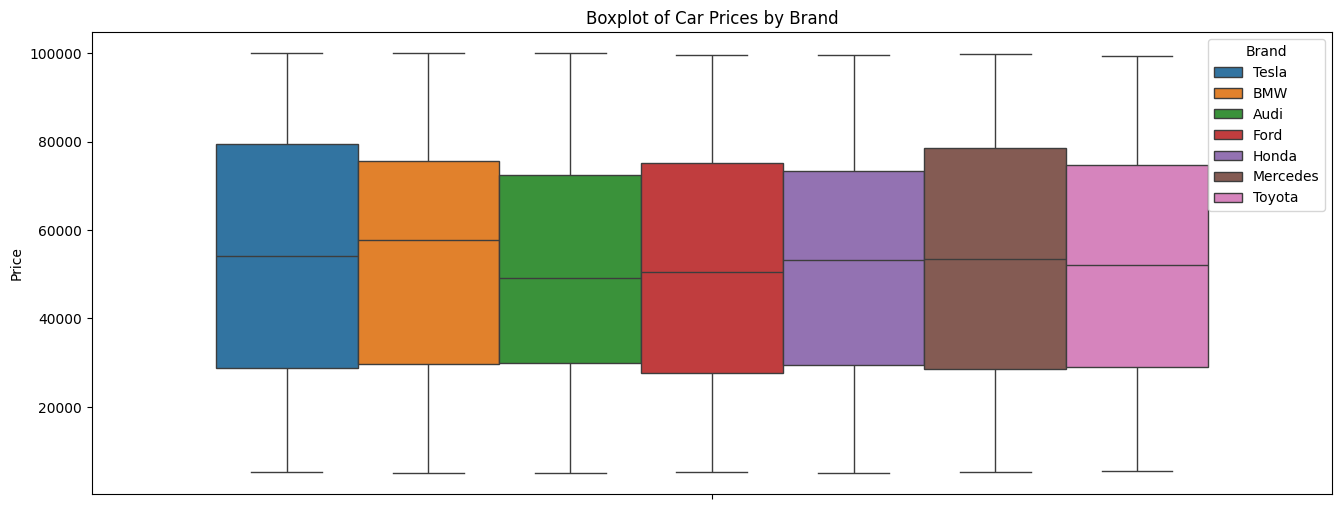

In [23]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
sns.boxplot(df, y='Price', hue='Brand')
plt.title('Boxplot of Car Prices by Brand')


Text(0.5, 1.0, 'Boxplot of Car Prices by Fuel Type')

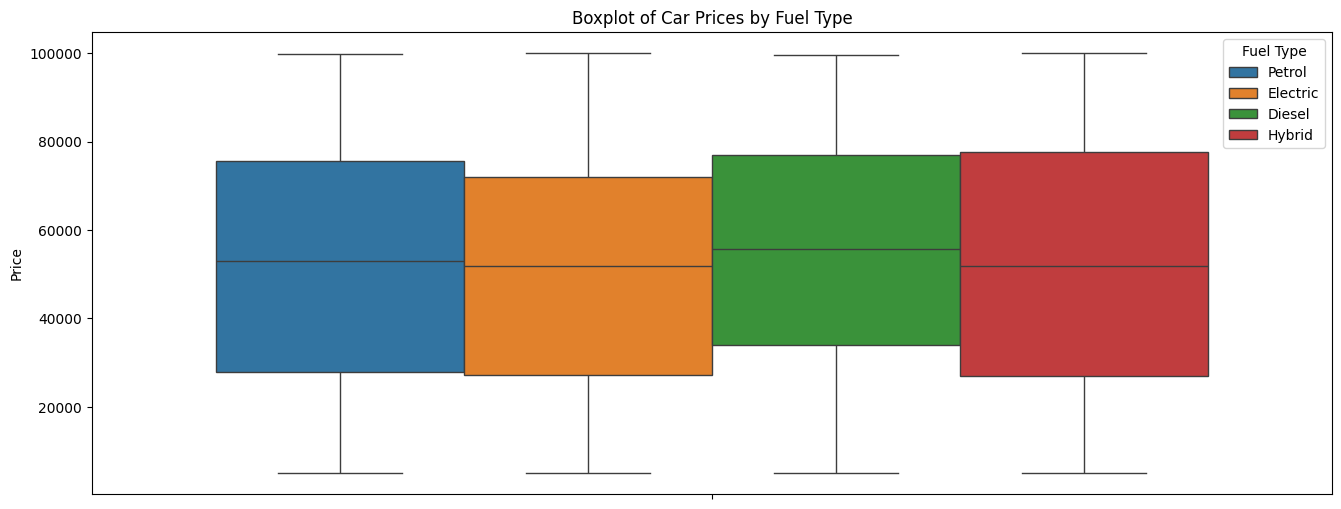

In [26]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
sns.boxplot(df, y='Price', hue='Fuel Type')
plt.title('Boxplot of Car Prices by Fuel Type')

Text(0.5, 1.0, 'Boxplot of Car Prices by Condition')

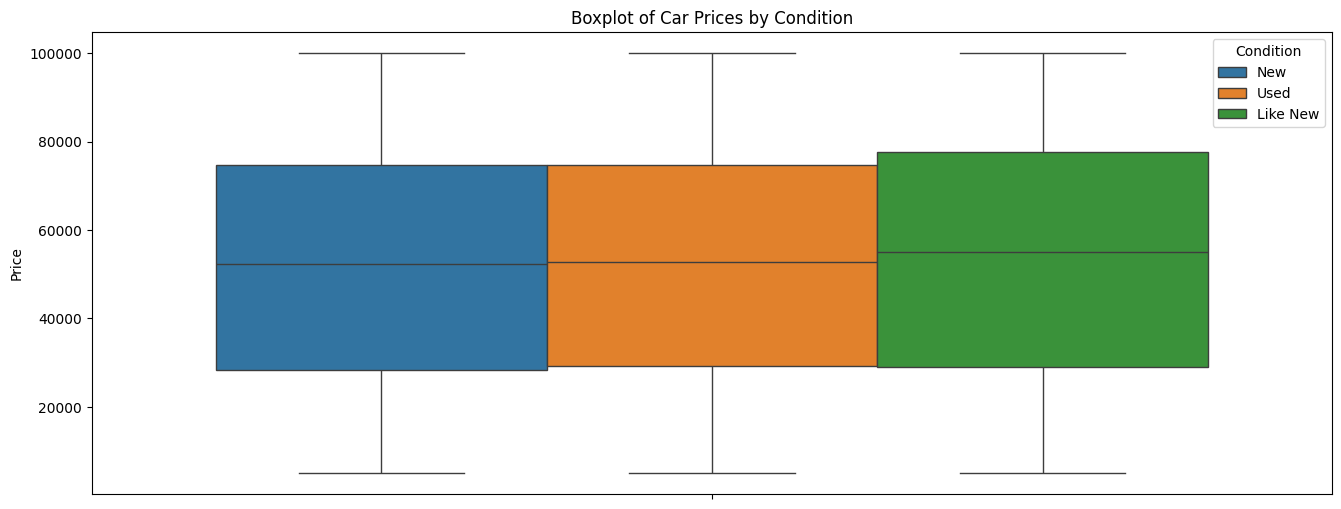

In [28]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
sns.boxplot(df, y='Price', hue='Condition')
plt.title('Boxplot of Car Prices by Condition')

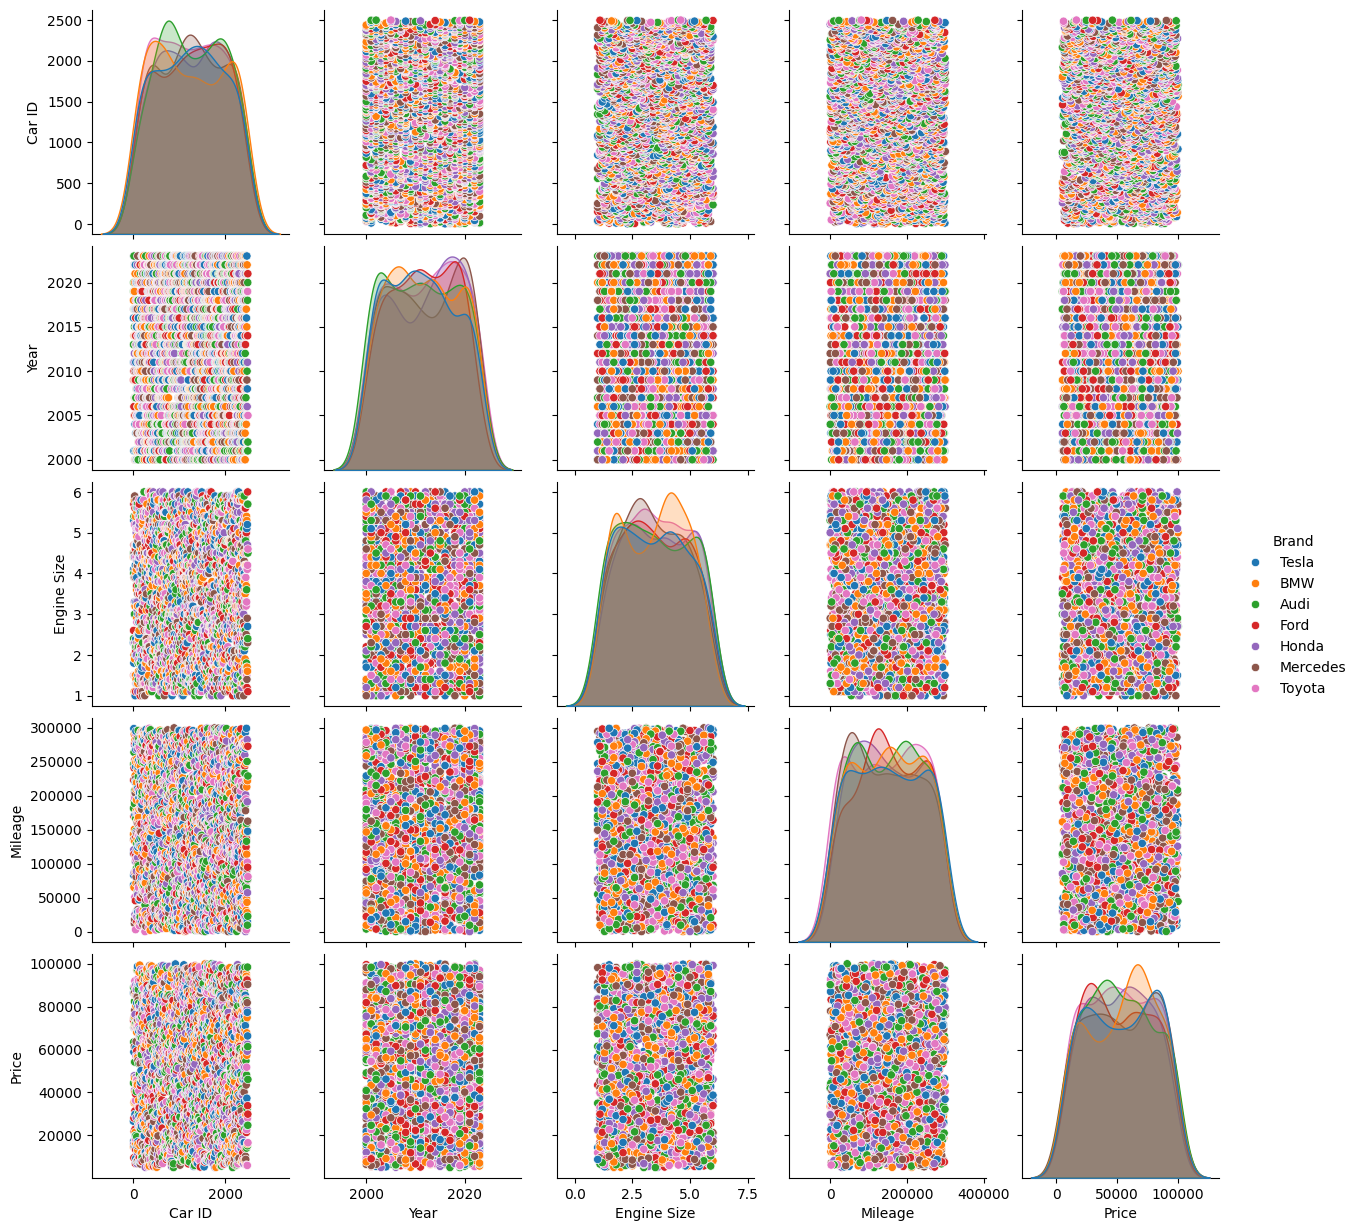

In [3]:
sns.pairplot(df, hue='Brand')

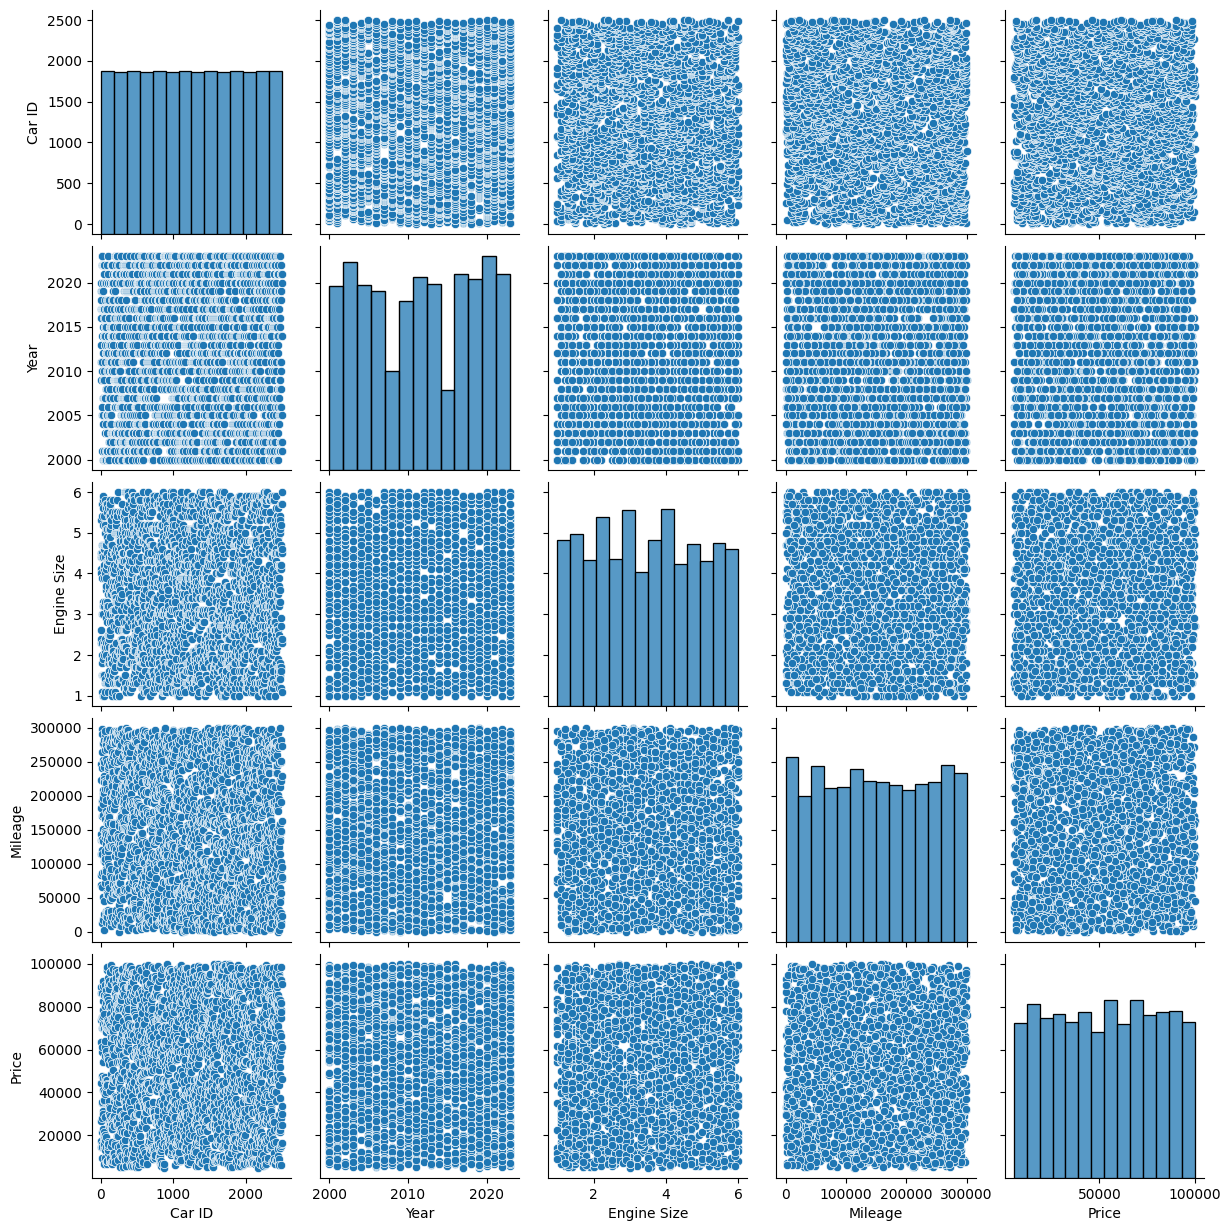

In [14]:
sns.pairplot(df)

### The correlation appears low, which is a poor indicator for Linear Regression but good for Decision Trees, Random Forests, and Neural Networks. Additionally, the histograms do not appear normal, which is also a drawback for Linear Regression.

In [22]:
numerical_values = df.select_dtypes(exclude=['object'])
numerical_values

# I separate every numerical value to get to work 
# on the heatmap and confirm if the correlation is indeed low

,Car ID,Year,Engine Size,Mileage,Price
0,1,2016,2.3,114832,26613.92
1,2,2018,4.4,143190,14679.61
2,3,2013,4.5,181601,44402.61
3,4,2011,4.1,68682,86374.33
4,5,2009,2.6,223009,73577.10
...,...,...,...,...,...
2495,2496,2020,2.4,22650,61384.10
2496,2497,2001,5.7,77701,24710.35
2497,2498,2021,1.1,272827,29902.45
2498,2499,2002,4.5,229164,46085.67


<Axes: >

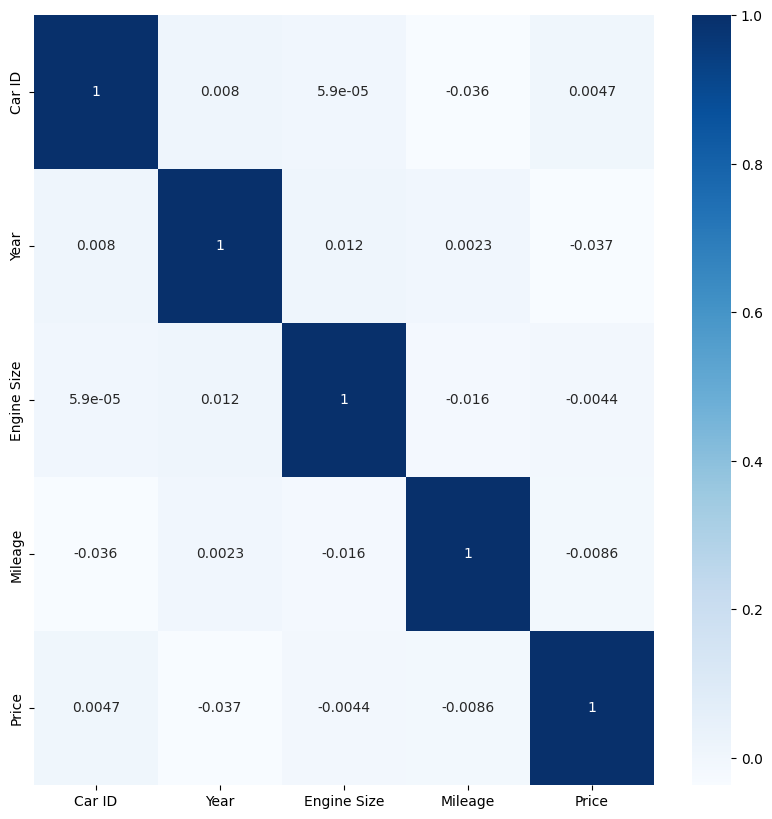

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(numerical_values.corr(), annot=True, cmap='Blues')


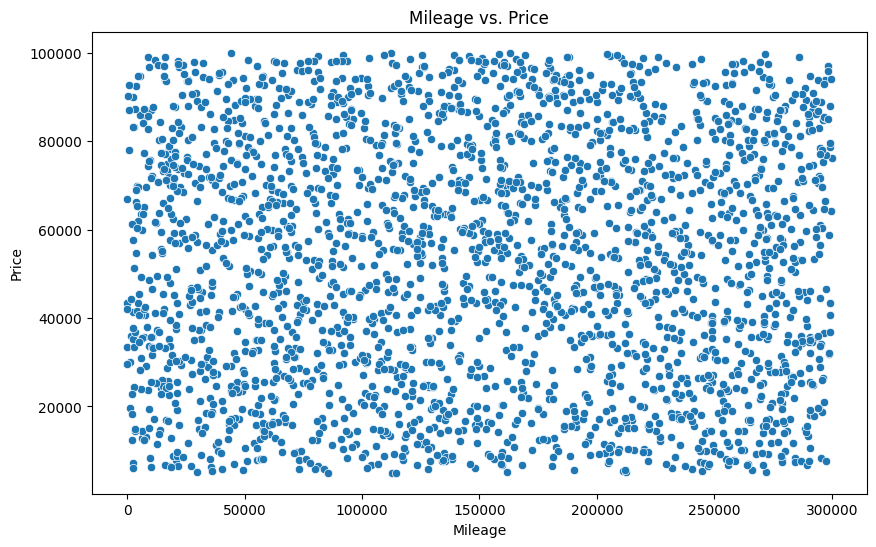

In [5]:
# Scatter plot for Mileage vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Mileage', y='Price')
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

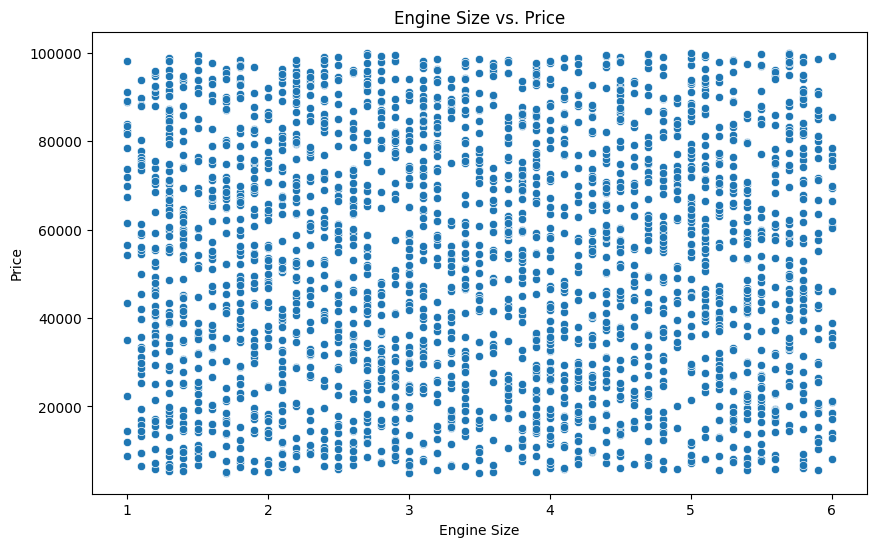

In [6]:
# Scatter plot for Engine Size vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine Size', y='Price')
plt.title('Engine Size vs. Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()


### This confirms our Linear Regression is gonna perform poorly, but let's see how poorly
Linear Regression assumes a linear relationship between the independent variables and the target variable, and it is sensitive to non-linearity, multicollinearity, and outliers. Given the characteristics of our dataset, we anticipate that the performance of the Linear Regression model may not meet expectations.

However, this exercise is valuable for understanding the limitations of Linear Regression in this context and for establishing a benchmark against which we can compare more complex models. We will evaluate the model's performance using appropriate metrics and discuss its implications.